  checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors  ...                  property age  installment_plan  \
0          none  ...

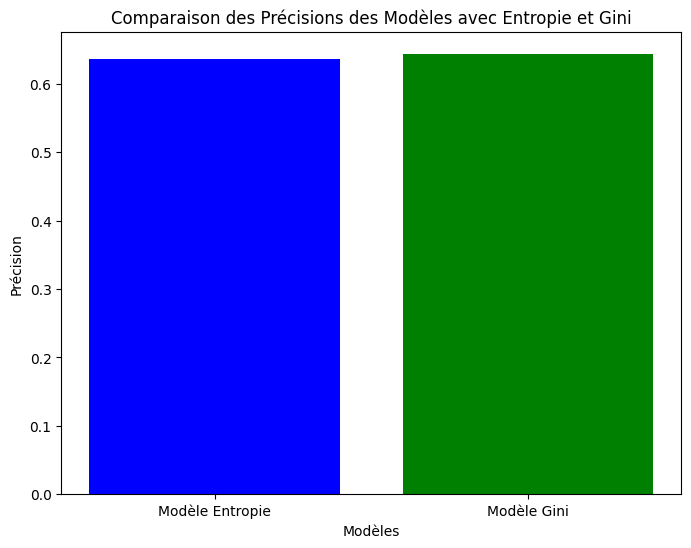

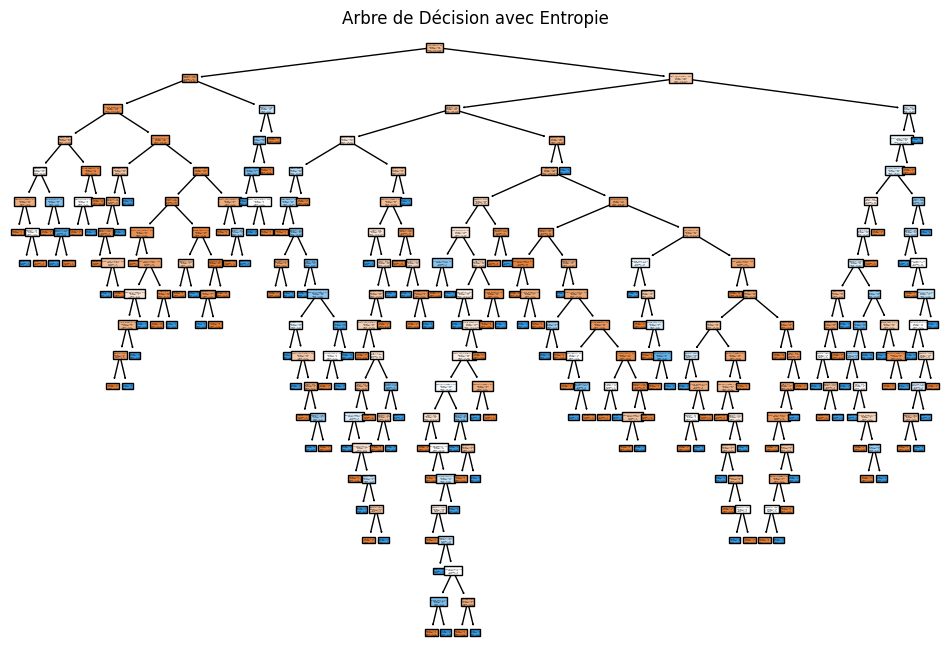

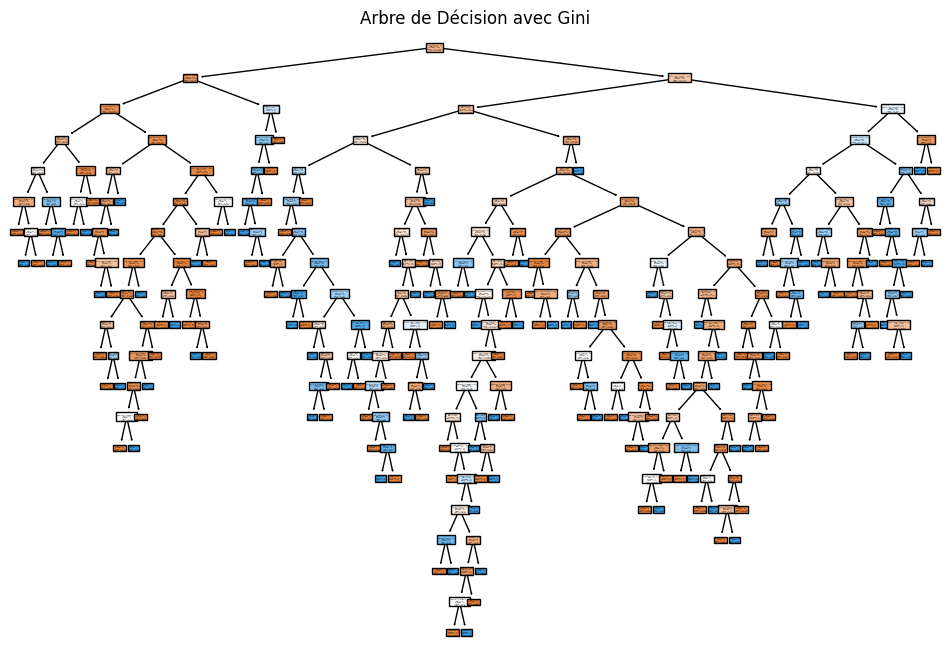

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Charger le dataset "creditcard.csv"
df = pd.read_csv('credit.csv')

# Vérifier les premières lignes pour confirmer la structure des données
print(df.head())

# Vérifier les types de données et identifier les colonnes catégorielles
print(df.dtypes)

# Remplacer les valeurs 'unknown' par NaN et gérer les valeurs manquantes
df.replace('unknown', pd.NA, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encoder les variables catégorielles
label_encoder = LabelEncoder()

# Identifier les colonnes catégorielles et les encoder
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop('default', axis=1)  # La colonne cible est 'default'
y = df['default']  # La colonne cible est 'default'

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle d'arbre de décision avec entropie
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

# Créer un modèle d'arbre de décision avec l'indice de Gini
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

# Prédictions avec les modèles
y_pred_entropy = model_entropy.predict(X_test)
y_pred_gini = model_gini.predict(X_test)

# Afficher les scores des deux modèles
print(f"Score du modèle avec entropie: {model_entropy.score(X_test, y_test)}")
print(f"Score du modèle avec Gini: {model_gini.score(X_test, y_test)}")

# Calculer la précision des deux modèles
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Précision du modèle avec entropie: {accuracy_entropy}")
print(f"Précision du modèle avec Gini: {accuracy_gini}")

# Visualiser les résultats comparatifs
labels = ['Modèle Entropie', 'Modèle Gini']
scores = [accuracy_entropy, accuracy_gini]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Modèles')
plt.ylabel('Précision')
plt.title('Comparaison des Précisions des Modèles avec Entropie et Gini')
plt.show()

# Visualiser l'arbre de décision basé sur l'entropie
plt.figure(figsize=(12, 8))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'])
plt.title("Arbre de Décision avec Entropie")
plt.show()

# Visualiser l'arbre de décision basé sur l'indice de Gini
plt.figure(figsize=(12, 8))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'])
plt.title("Arbre de Décision avec Gini")
plt.show()



# Ce projet applique des arbres de décision (Entropie & Gini) sur les données de crédit.  
# Les modèles sont évalués en termes de précision et visualisés pour analyser leurs décisions.  
# La comparaison montre des performances similaires, avec une précision légèrement variable entre les critères.  
